In [1]:
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import RadarPointCloud, Box
from nuscenes.utils.geometry_utils import points_in_box, view_points, BoxVisibility
from pyquaternion import Quaternion
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
nusc = NuScenes(version='v1.0-mini', dataroot='v1.0-mini', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.266 seconds.
Reverse indexing ...
Done reverse indexing in 0.0 seconds.


In [3]:
nusc.list_scenes()

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

---

In [4]:
my_scene = nusc.scene[5]
my_scene

{'token': 'c5224b9b454b4ded9b5d2d2634bbda8a',
 'log_token': '8ff48ad1df8e4966a2151730c92b7f3c',
 'nbr_samples': 40,
 'first_sample_token': 'c1676a2feac74eee8aa38ca3901787d6',
 'last_sample_token': '63c24b51feb94f14bec29022dae4975d',
 'name': 'scene-0796',
 'description': 'Scooter, peds on sidewalk, bus, cars, truck, fake construction worker, bicycle, cross intersection, car overtaking us'}

In [5]:
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)
my_sample

{'token': 'c1676a2feac74eee8aa38ca3901787d6',
 'timestamp': 1538448744447639,
 'prev': '',
 'next': 'd6b0de49811b4d1b86a0933719c0c44a',
 'scene_token': 'c5224b9b454b4ded9b5d2d2634bbda8a',
 'data': {'RADAR_FRONT': '26d0c02b681f48bba9d4bde8fc68a9c7',
  'RADAR_FRONT_LEFT': '496dc8b327814f7ba48a74972bde1433',
  'RADAR_FRONT_RIGHT': 'f4b5941dcfa3400ea0a24f5fbe90cef5',
  'RADAR_BACK_LEFT': '1268ee4a07cf44c099017710c624ba7b',
  'RADAR_BACK_RIGHT': '9877d1dbb6624f1393962060f39c5452',
  'LIDAR_TOP': '17dcee974ba349e884f676670d0c66e7',
  'CAM_FRONT': '98bea7c1f83340119051b7b7a0185033',
  'CAM_FRONT_RIGHT': '28cbeca98a834194a4dc71c616a429ce',
  'CAM_BACK_RIGHT': '4118dd0fa03f451c99a09ee72a0d6fbb',
  'CAM_BACK_LEFT': '9706ab2aaf304042bfb731ebf33b35d8',
  'CAM_BACK': 'be22879d93f04150bb9466211012205e',
  'CAM_FRONT_LEFT': '272da8148606496f92712408680498c4'},
 'anns': ['3f295dcfa09a491ca53efbb2f048b963',
  '44928e4ac6134cacbf7c63429d38d021',
  'a89b46240ab7452cb990cc034efffd8c',
  'f2b2109b8c754caa8

In [6]:
nusc.list_sample(my_sample['token'])

Sample: c1676a2feac74eee8aa38ca3901787d6

sample_data_token: 26d0c02b681f48bba9d4bde8fc68a9c7, mod: radar, channel: RADAR_FRONT
sample_data_token: 496dc8b327814f7ba48a74972bde1433, mod: radar, channel: RADAR_FRONT_LEFT
sample_data_token: f4b5941dcfa3400ea0a24f5fbe90cef5, mod: radar, channel: RADAR_FRONT_RIGHT
sample_data_token: 1268ee4a07cf44c099017710c624ba7b, mod: radar, channel: RADAR_BACK_LEFT
sample_data_token: 9877d1dbb6624f1393962060f39c5452, mod: radar, channel: RADAR_BACK_RIGHT
sample_data_token: 17dcee974ba349e884f676670d0c66e7, mod: lidar, channel: LIDAR_TOP
sample_data_token: 98bea7c1f83340119051b7b7a0185033, mod: camera, channel: CAM_FRONT
sample_data_token: 28cbeca98a834194a4dc71c616a429ce, mod: camera, channel: CAM_FRONT_RIGHT
sample_data_token: 4118dd0fa03f451c99a09ee72a0d6fbb, mod: camera, channel: CAM_BACK_RIGHT
sample_data_token: 9706ab2aaf304042bfb731ebf33b35d8, mod: camera, channel: CAM_BACK_LEFT
sample_data_token: be22879d93f04150bb9466211012205e, mod: camera, cha

In [7]:
my_sample['data']

{'RADAR_FRONT': '26d0c02b681f48bba9d4bde8fc68a9c7',
 'RADAR_FRONT_LEFT': '496dc8b327814f7ba48a74972bde1433',
 'RADAR_FRONT_RIGHT': 'f4b5941dcfa3400ea0a24f5fbe90cef5',
 'RADAR_BACK_LEFT': '1268ee4a07cf44c099017710c624ba7b',
 'RADAR_BACK_RIGHT': '9877d1dbb6624f1393962060f39c5452',
 'LIDAR_TOP': '17dcee974ba349e884f676670d0c66e7',
 'CAM_FRONT': '98bea7c1f83340119051b7b7a0185033',
 'CAM_FRONT_RIGHT': '28cbeca98a834194a4dc71c616a429ce',
 'CAM_BACK_RIGHT': '4118dd0fa03f451c99a09ee72a0d6fbb',
 'CAM_BACK_LEFT': '9706ab2aaf304042bfb731ebf33b35d8',
 'CAM_BACK': 'be22879d93f04150bb9466211012205e',
 'CAM_FRONT_LEFT': '272da8148606496f92712408680498c4'}

---

In [112]:
sensor = 'RADAR_FRONT'
# radar_front_data = nusc.get('sample_data', my_sample['data'][sensor])
radar_front_data = nusc.get('sample_data', nusc.sample[200]['data'][sensor])
radar_front_data

{'token': '80bfce6a9a4347bdb31f7e3b29079d27',
 'sample_token': 'f3e7e088082d4aabb9a3bf504d4ac904',
 'ego_pose_token': '80bfce6a9a4347bdb31f7e3b29079d27',
 'calibrated_sensor_token': '9bd45b58ca0e4ccdad7ee44c4ec81504',
 'timestamp': 1535657127663555,
 'fileformat': 'pcd',
 'is_key_frame': True,
 'height': 0,
 'width': 0,
 'filename': 'samples/RADAR_FRONT/n008-2018-08-30-15-16-55-0400__RADAR_FRONT__1535657127663555.pcd',
 'prev': '7c30fca72e284df5a24202384b18c0ca',
 'next': '5d198b65417e40cda6b52bf248597a9e',
 'sensor_modality': 'radar',
 'channel': 'RADAR_FRONT'}

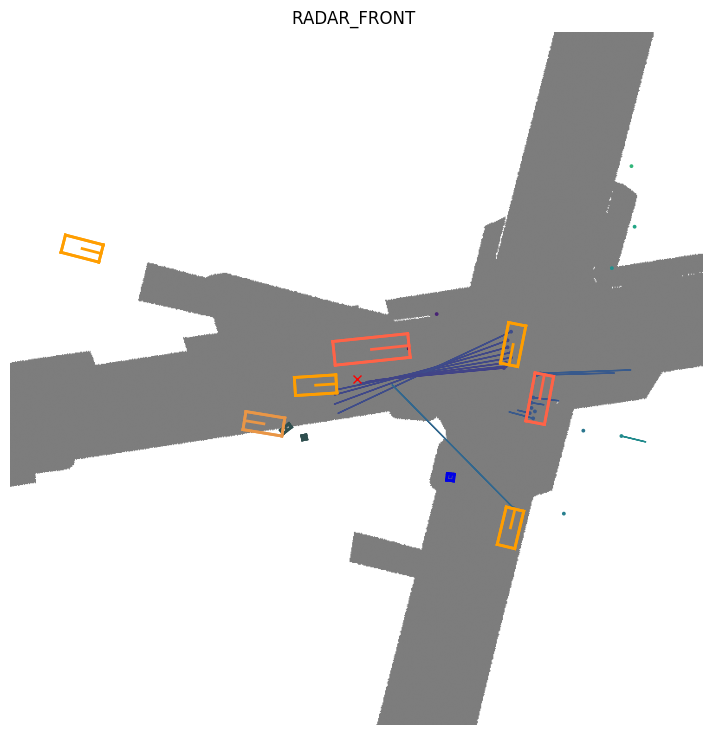

In [113]:
nusc.render_sample_data(radar_front_data['token'])

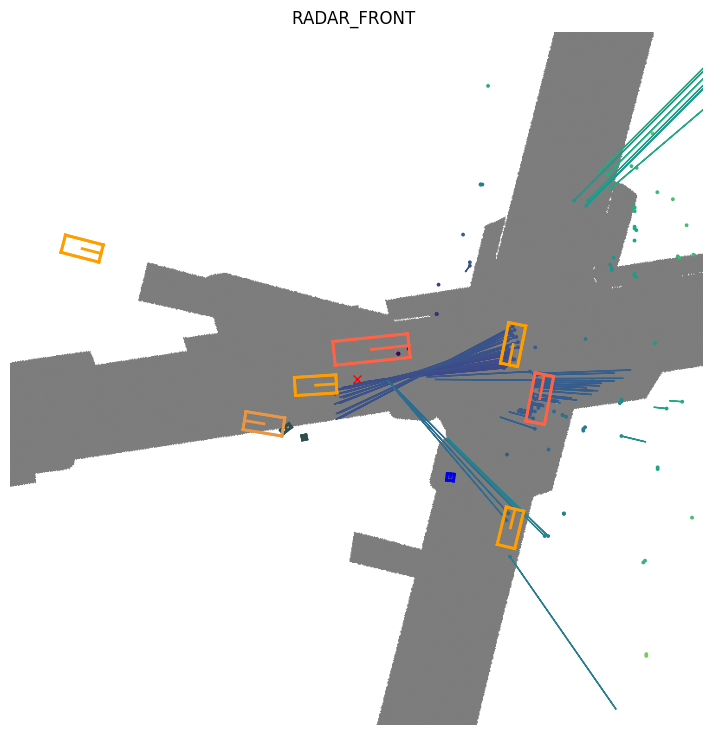

In [114]:
RadarPointCloud.disable_filters()
nusc.render_sample_data(radar_front_data['token'], nsweeps=3, underlay_map=True)
RadarPointCloud.default_filters()

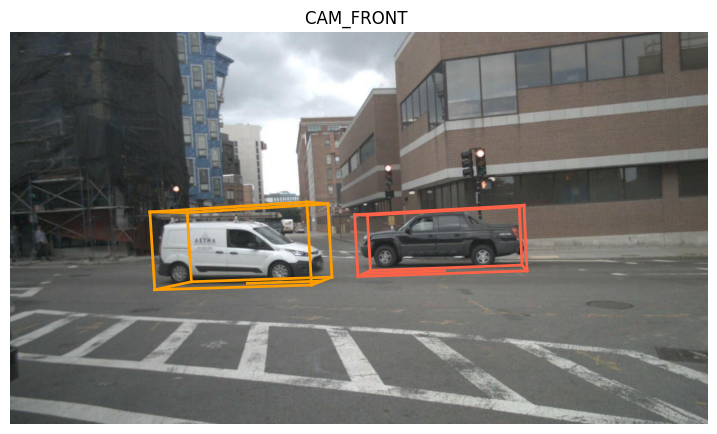

In [116]:
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', nusc.sample[200]['data'][sensor])
nusc.render_sample_data(cam_front_data['token'])

---

In [12]:
my_instance = nusc.instance[599]
my_instance

{'token': '9cba9cd8af85487fb010652c90d845b5',
 'category_token': 'fedb11688db84088883945752e480c2c',
 'nbr_annotations': 16,
 'first_annotation_token': '77afa772cb4a4e5c8a5a53f2019bdba0',
 'last_annotation_token': '6fed6d902e5e487abb7444f62e1a2341'}

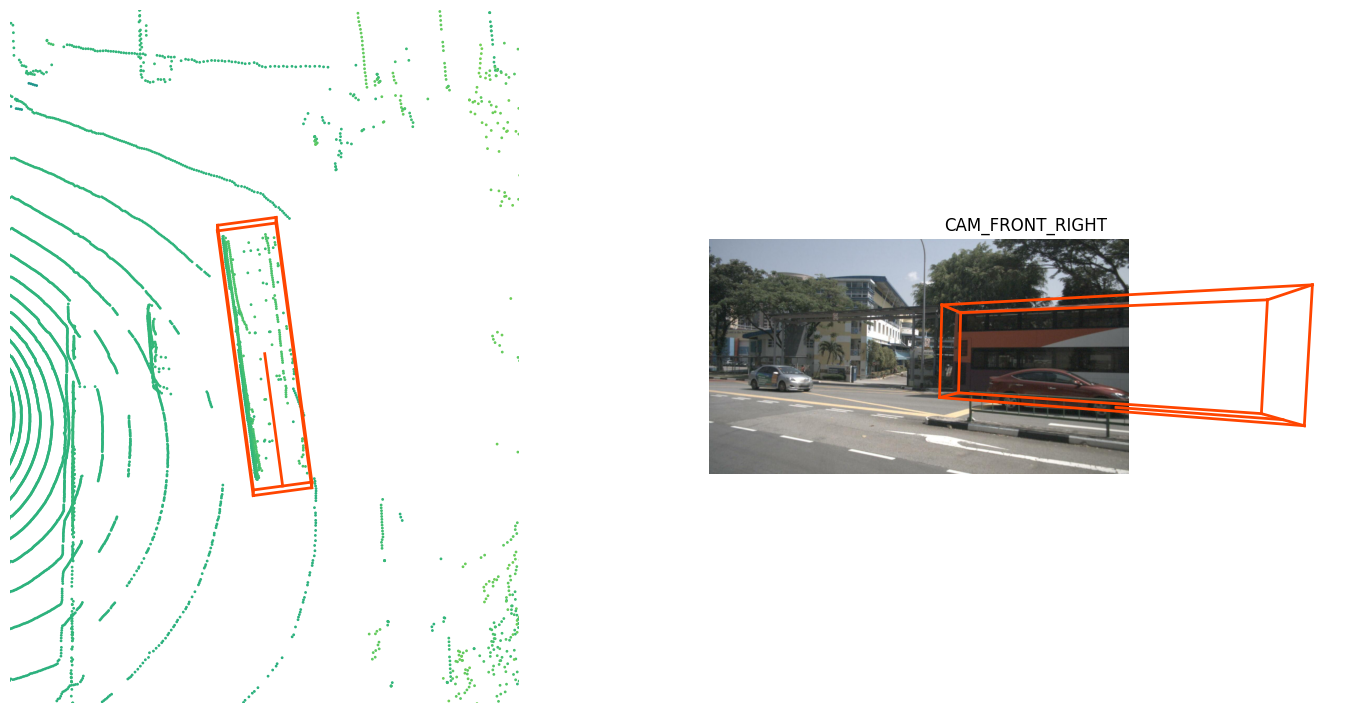

In [13]:
instance_token = my_instance['token']
nusc.render_instance(instance_token)

---

In [14]:
# Count radar points not enclosed by any annotation box for RADAR_FRONT of my_sample
# Iterate through all radar sensors in this sample; keep RADAR_FRONT variables for later cells
radar_channels = ['RADAR_FRONT', 'RADAR_FRONT_LEFT', 'RADAR_FRONT_RIGHT', 'RADAR_BACK_LEFT', 'RADAR_BACK_RIGHT']

radar_stats = []                 # per-sensor summary
outside_indices_by_sensor = {}   # store outside indices for each sensor

for rc in radar_channels:
    if rc not in my_sample['data']:
        continue
    sd = nusc.get('sample_data', my_sample['data'][rc])
    rpc = RadarPointCloud.from_file(f"{nusc.dataroot}/{sd['filename']}")
    _, bx, _ = nusc.get_sample_data(sd['token'], BoxVisibility.ANY)

    n_pts = rpc.points.shape[1]
    inside_mask = np.zeros(n_pts, dtype=bool)
    for b in bx:
        inside_mask |= points_in_box(b, rpc.points[:3, :])
    inside_cnt = int(inside_mask.sum())
    outside_cnt = n_pts - inside_cnt
    outside_idx = np.where(~inside_mask)[0]

    radar_stats.append({
        'sensor': rc,
        'num_points': n_pts,
        'inside_count': inside_cnt,
        'outside_count': outside_cnt,
        'num_boxes': len(bx)
    })
    outside_indices_by_sensor[rc] = outside_idx

    print(f"{rc}: points={n_pts}, inside={inside_cnt}, outside={outside_cnt}, boxes={len(bx)}")

    # Preserve original variable names for RADAR_FRONT so downstream cell 17 still works
    if rc == 'RADAR_FRONT':
        radar_front_data = sd
        radar_pc = rpc
        num_points = n_pts
        inside_any = inside_mask
        inside_count = inside_cnt
        outside_count = outside_cnt
        outside_indices = outside_idx

# Optional dataframe summary
radar_counts_df = pd.DataFrame(radar_stats)

RADAR_FRONT: points=68, inside=2, outside=66, boxes=21
RADAR_FRONT_LEFT: points=1, inside=0, outside=1, boxes=21
RADAR_FRONT_RIGHT: points=42, inside=0, outside=42, boxes=21
RADAR_BACK_LEFT: points=72, inside=4, outside=68, boxes=21
RADAR_BACK_RIGHT: points=65, inside=3, outside=62, boxes=21


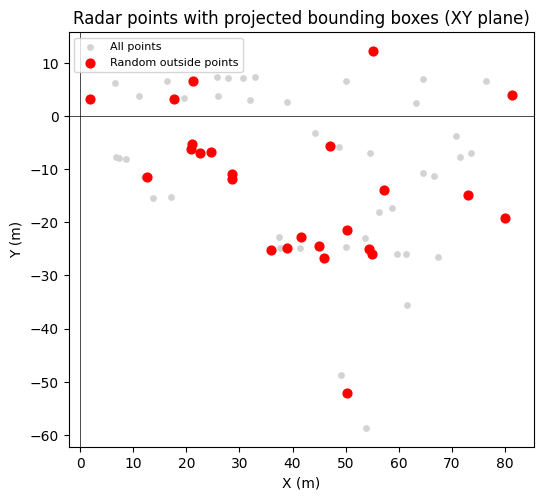

In [15]:
# Randomly select some radar points that are NOT inside any bounding box
num_show = 25
if outside_indices.size == 0:
    print("No outside points available.")
else:
    sel = np.random.choice(outside_indices, size=min(num_show, outside_indices.size), replace=False)
    
    # Extract coordinates
    x_all, y_all = radar_pc.points[0], radar_pc.points[1]
    x_sel, y_sel = x_all[sel], y_all[sel]

    plt.figure(figsize=(6, 6))
    plt.scatter(x_all, y_all, s=15, c='lightgray', label='All points')
    plt.scatter(x_sel, y_sel, s=40, c='red', label='Random outside points')

    plt.axhline(0, color='k', lw=0.5)
    plt.axvline(0, color='k', lw=0.5)
    plt.title("Radar points with projected bounding boxes (XY plane)")
    plt.xlabel("X (m)")
    plt.ylabel("Y (m)")
    plt.legend(loc='best', fontsize=8)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

---

In [16]:
nusc.list_categories()

Category stats for split v1.0-mini:
human.pedestrian.adult      n= 4765, width= 0.68±0.11, len= 0.73±0.17, height= 1.76±0.12, lw_aspect= 1.08±0.23
human.pedestrian.child      n=   46, width= 0.46±0.08, len= 0.45±0.09, height= 1.37±0.06, lw_aspect= 0.97±0.05
human.pedestrian.constructi n=  193, width= 0.69±0.07, len= 0.74±0.12, height= 1.78±0.05, lw_aspect= 1.07±0.16
human.pedestrian.personal_m n=   25, width= 0.83±0.00, len= 1.28±0.00, height= 1.87±0.00, lw_aspect= 1.55±0.00
human.pedestrian.police_off n=   11, width= 0.59±0.00, len= 0.47±0.00, height= 1.81±0.00, lw_aspect= 0.80±0.00
movable_object.barrier      n= 2323, width= 2.32±0.49, len= 0.61±0.11, height= 1.06±0.10, lw_aspect= 0.28±0.09
movable_object.debris       n=   13, width= 0.43±0.00, len= 1.43±0.00, height= 0.46±0.00, lw_aspect= 3.35±0.00
movable_object.pushable_pul n=   82, width= 0.51±0.06, len= 0.79±0.10, height= 1.04±0.20, lw_aspect= 1.55±0.18
movable_object.trafficcone  n= 1378, width= 0.47±0.14, len= 0.45±0.07, heigh

In [17]:
nusc.category[9]

{'token': 'dfd26f200ade4d24b540184e16050022',
 'name': 'vehicle.motorcycle',
 'description': 'Gasoline or electric powered 2-wheeled vehicle designed to move rapidly (at the speed of standard cars) on the road surface. This category includes all motorcycles, vespas and scooters.'}

---

In [18]:
nusc.sensor

[{'token': '725903f5b62f56118f4094b46a4470d8',
  'channel': 'CAM_FRONT',
  'modality': 'camera'},
 {'token': 'ce89d4f3050b5892b33b3d328c5e82a3',
  'channel': 'CAM_BACK',
  'modality': 'camera'},
 {'token': 'a89643a5de885c6486df2232dc954da2',
  'channel': 'CAM_BACK_LEFT',
  'modality': 'camera'},
 {'token': 'ec4b5d41840a509984f7ec36419d4c09',
  'channel': 'CAM_FRONT_LEFT',
  'modality': 'camera'},
 {'token': '2f7ad058f1ac5557bf321c7543758f43',
  'channel': 'CAM_FRONT_RIGHT',
  'modality': 'camera'},
 {'token': 'ca7dba2ec9f95951bbe67246f7f2c3f7',
  'channel': 'CAM_BACK_RIGHT',
  'modality': 'camera'},
 {'token': 'dc8b396651c05aedbb9cdaae573bb567',
  'channel': 'LIDAR_TOP',
  'modality': 'lidar'},
 {'token': '47fcd48f71d75e0da5c8c1704a9bfe0a',
  'channel': 'RADAR_FRONT',
  'modality': 'radar'},
 {'token': '232a6c4dc628532e81de1c57120876e9',
  'channel': 'RADAR_FRONT_RIGHT',
  'modality': 'radar'},
 {'token': '1f69f87a4e175e5ba1d03e2e6d9bcd27',
  'channel': 'RADAR_FRONT_LEFT',
  'modality'

---

In [19]:
nusc.sample

[{'token': 'ca9a282c9e77460f8360f564131a8af5',
  'timestamp': 1532402927647951,
  'prev': '',
  'next': '39586f9d59004284a7114a68825e8eec',
  'scene_token': 'cc8c0bf57f984915a77078b10eb33198',
  'data': {'RADAR_FRONT': '37091c75b9704e0daa829ba56dfa0906',
   'RADAR_FRONT_LEFT': '11946c1461d14016a322916157da3c7d',
   'RADAR_FRONT_RIGHT': '491209956ee3435a9ec173dad3aaf58b',
   'RADAR_BACK_LEFT': '312aa38d0e3e4f01b3124c523e6f9776',
   'RADAR_BACK_RIGHT': '07b30d5eb6104e79be58eadf94382bc1',
   'LIDAR_TOP': '9d9bf11fb0e144c8b446d54a8a00184f',
   'CAM_FRONT': 'e3d495d4ac534d54b321f50006683844',
   'CAM_FRONT_RIGHT': 'aac7867ebf4f446395d29fbd60b63b3b',
   'CAM_BACK_RIGHT': '79dbb4460a6b40f49f9c150cb118247e',
   'CAM_BACK': '03bea5763f0f4722933508d5999c5fd8',
   'CAM_BACK_LEFT': '43893a033f9c46d4a51b5e08a67a1eb7',
   'CAM_FRONT_LEFT': 'fe5422747a7d4268a4b07fc396707b23'},
  'anns': ['ef63a697930c4b20a6b9791f423351da',
   '6b89da9bf1f84fd6a5fbe1c3b236f809',
   '924ee6ac1fed440a9d9e3720aac635a0',


In [20]:
nusc.sample_data

[{'token': '5ace90b379af485b9dcb1584b01e7212',
  'sample_token': '39586f9d59004284a7114a68825e8eec',
  'ego_pose_token': '5ace90b379af485b9dcb1584b01e7212',
  'calibrated_sensor_token': 'f4d2a6c281f34a7eb8bb033d82321f79',
  'timestamp': 1532402927814384,
  'fileformat': 'pcd',
  'is_key_frame': False,
  'height': 0,
  'width': 0,
  'filename': 'sweeps/RADAR_FRONT/n015-2018-07-24-11-22-45+0800__RADAR_FRONT__1532402927814384.pcd',
  'prev': 'f0b8593e08594a3eb1152c138b312813',
  'next': '978db2bcdf584b799c13594a348576d2',
  'sensor_modality': 'radar',
  'channel': 'RADAR_FRONT'},
 {'token': '37091c75b9704e0daa829ba56dfa0906',
  'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
  'ego_pose_token': '37091c75b9704e0daa829ba56dfa0906',
  'calibrated_sensor_token': 'f4d2a6c281f34a7eb8bb033d82321f79',
  'timestamp': 1532402927664178,
  'fileformat': 'pcd',
  'is_key_frame': True,
  'height': 0,
  'width': 0,
  'filename': 'samples/RADAR_FRONT/n015-2018-07-24-11-22-45+0800__RADAR_FRONT__153240

---

In [21]:
results = []
for sample in nusc.sample:
    radar_token = [sd['token'] for sd in nusc.sample_data if sd['sample_token'] == sample['token'] and sd['channel'] == 'RADAR_FRONT'][0]
    radar_sd = nusc.get('sample_data', radar_token)
    radar_pc = RadarPointCloud.from_file('v1.0-mini/' + radar_sd['filename'])
    points = radar_pc.points  # shape: (18, N), see RadarPointCloud doc for details
 
    # Each radar point: [x, y, z, dyn_prop, id, rcs, vx, vy, vx_comp, vy_comp, is_quality_valid, ambig_state, ..., sensor_id, timestamp]
    for i in range(points.shape[1]):
        point = points[:, i]
        results.append({
            'sample_token': sample['token'],
            'x': point[0],
            'y': point[1],
            'z': point[2],
            'dyn_prop': point[3],
            'id': point[4],
            'rcs': point[5],
            'vx': point[6],
            'vy': point[7],
            'vx_comp': point[8],
            'vy_comp': point[9],
            'is_quality_valid': point[10],
            'ambig_state': point[11],
            'x_rms': point[12],
            'y_rms': point[13],
            'invalid_state': point[14],
            'pdh0': point[15],
            'sensor_id': point[16],
            'timestamp': point[17]
        })

# Save to CSV
df = pd.DataFrame(results)
df.to_csv('radar_front_points.csv', index=False)

---

In [22]:
radar_channels = [
    'RADAR_FRONT',
    'RADAR_FRONT_LEFT',
    'RADAR_FRONT_RIGHT',
    'RADAR_BACK_LEFT',
    'RADAR_BACK_RIGHT'
]

results = []

# Process all samples
for sample_idx, sample in enumerate(nusc.sample):
    scene = nusc.get('scene', sample['scene_token'])
    scene_name = scene['name']
    
    # Process each annotation in this sample
    for ann_token in sample['anns']:
        sample_annotation = nusc.get('sample_annotation', ann_token)
        
        # For each radar channel
        for radar_channel in radar_channels:
            if radar_channel in sample['data']:
                radar_token = sample['data'][radar_channel]
                radar_sd = nusc.get('sample_data', radar_token)
                
                # if radar_sd['is_key_frame'] == False:
                #     print("sweep")
                #     continue
                # else:
                #     print("sample")
                #     continue

                radar_pc = RadarPointCloud.from_file('v1.0-mini/' + radar_sd['filename'])
                
                # Get annotation's 3D box
                _, boxes, _ = nusc.get_sample_data(radar_token, 
                                                  BoxVisibility.ANY, 
                                                  selected_anntokens=[ann_token])
                
                if not boxes:
                    continue  # Skip if box not visible from this radar
                
                # Check which points are inside the box
                points_mask = points_in_box(boxes[0], radar_pc.points[0:3, :], wlh_factor=1.0)
                
                # Process only points inside the box
                if np.any(points_mask):
                    points = radar_pc.points[:, points_mask]
                    timestamp = radar_sd['timestamp']
                    
                    # Add each point with its annotation
                    for i in range(points.shape[1]):
                        point = points[:, i]
                        results.append({
                            'sample_token': sample['token'],
                            'radar_channel': radar_channel,
                            'annotation': sample_annotation['category_name'],
                            'annotation_token': ann_token,
                            'instance_token': sample_annotation['instance_token'],
                            'num_sample': sample_idx,
                            'timestamp': timestamp,
                            'utc_timestamp': datetime.utcfromtimestamp(timestamp / 1_000_000).strftime('%Y-%m-%d %H:%M:%S'),
                            'scene_name': scene_name,
                            'file_name': radar_sd['filename'],
                            'x_radar': point[0],
                            'y_radar': point[1],
                            'z_radar': point[2],
                            'dyn_prop': point[3],
                            'id': point[4],
                            'rcs': point[5],
                            'vx': point[6],
                            'vy': point[7],
                            'vx_comp': point[8],
                            'vy_comp': point[9],
                            'is_quality_valid': point[10],
                            'ambig_state': point[11],
                            'x_rms': point[12],
                            'y_rms': point[13],
                            'invalid_state': point[14],
                            'pdh0': point[15],
                            'vx_rms': point[16],
                            'vy_rms': point[17]
                        })
    
    # Print progress
    print(f"Processed sample {sample_idx+1}/{len(nusc.sample)}")

# Save to CSV
df = pd.DataFrame(results)
df.to_csv('nuscenes_points_with_annotations.csv', index=False)
print(f"Created dataset with {len(df)} annotated radar points")

/tmp/ipykernel_36989/1650784294.py:62: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  'utc_timestamp': datetime.utcfromtimestamp(timestamp / 1_000_000).strftime('%Y-%m-%d %H:%M:%S'),


Processed sample 1/404
Processed sample 2/404
Processed sample 3/404
Processed sample 4/404
Processed sample 5/404
Processed sample 6/404
Processed sample 7/404
Processed sample 8/404
Processed sample 9/404
Processed sample 10/404
Processed sample 11/404
Processed sample 12/404
Processed sample 13/404
Processed sample 14/404
Processed sample 15/404
Processed sample 16/404
Processed sample 17/404
Processed sample 18/404
Processed sample 19/404
Processed sample 20/404
Processed sample 21/404
Processed sample 22/404
Processed sample 23/404
Processed sample 24/404
Processed sample 25/404
Processed sample 26/404
Processed sample 27/404
Processed sample 28/404
Processed sample 29/404
Processed sample 30/404
Processed sample 31/404
Processed sample 32/404
Processed sample 33/404
Processed sample 34/404
Processed sample 35/404
Processed sample 36/404
Processed sample 37/404
Processed sample 38/404
Processed sample 39/404
Processed sample 40/404
Processed sample 41/404
Processed sample 42/404
P

---

In [23]:
# Generate dataset including points outside any annotation (labeled as 'noise')

results_with_noise = []

for sample_idx, sample in enumerate(nusc.sample):
    scene = nusc.get('scene', sample['scene_token'])
    scene_name = scene['name']
    
    for radar_channel in radar_channels:
        if radar_channel not in sample['data']:
            continue
        
        radar_token = sample['data'][radar_channel]
        radar_sd = nusc.get('sample_data', radar_token)
        radar_pc = RadarPointCloud.from_file('v1.0-mini/' + radar_sd['filename'])
        points = radar_pc.points  # shape (18, N)
        n_pts = points.shape[1]
        timestamp = radar_sd['timestamp']
        utc_ts = datetime.utcfromtimestamp(timestamp / 1_000_000).strftime('%Y-%m-%d %H:%M:%S')
        
        # Prepare container for per-point annotations
        per_point_ann = [[] for _ in range(n_pts)]
        
        # Iterate sample annotations and assign points
        for ann_token in sample['anns']:
            sample_annotation = nusc.get('sample_annotation', ann_token)
            # Get only this annotation's box in radar frame (if visible)
            _, boxes, _ = nusc.get_sample_data(
                radar_token,
                BoxVisibility.ANY,
                selected_anntokens=[ann_token]
            )
            if not boxes:
                continue
            box = boxes[0]
            mask = points_in_box(box, points[0:3, :], wlh_factor=1.0)
            if np.any(mask):
                cat_name = sample_annotation['category_name']
                inst_token = sample_annotation['instance_token']
                for idx in np.where(mask)[0]:
                    per_point_ann[idx].append((cat_name, ann_token, inst_token))
        
        # Emit rows: annotated points (could be multiple rows if multiple boxes) + noise
        for idx in range(n_pts):
            point = points[:, idx]
            if per_point_ann[idx]:
                for cat_name, ann_token, inst_token in per_point_ann[idx]:
                    results_with_noise.append({
                        'sample_token': sample['token'],
                        'radar_channel': radar_channel,
                        'annotation': cat_name,
                        'annotation_token': ann_token,
                        'instance_token': inst_token,
                        'num_sample': sample_idx,
                        'timestamp': timestamp,
                        'utc_timestamp': utc_ts,
                        'scene_name': scene_name,
                        'file_name': radar_sd['filename'],
                        'x_radar': point[0],
                        'y_radar': point[1],
                        'z_radar': point[2],
                        'dyn_prop': point[3],
                        'id': point[4],
                        'rcs': point[5],
                        'vx': point[6],
                        'vy': point[7],
                        'vx_comp': point[8],
                        'vy_comp': point[9],
                        'is_quality_valid': point[10],
                        'ambig_state': point[11],
                        'x_rms': point[12],
                        'y_rms': point[13],
                        'invalid_state': point[14],
                        'pdh0': point[15],
                        'vx_rms': point[16],
                        'vy_rms': point[17]
                    })
            else:
                # Noise point (no enclosing box)
                results_with_noise.append({
                    'sample_token': sample['token'],
                    'radar_channel': radar_channel,
                    'annotation': 'noise',
                    'annotation_token': '',
                    'instance_token': '',
                    'num_sample': sample_idx,
                    'timestamp': timestamp,
                    'utc_timestamp': utc_ts,
                    'scene_name': scene_name,
                    'file_name': radar_sd['filename'],
                    'x_radar': point[0],
                    'y_radar': point[1],
                    'z_radar': point[2],
                    'dyn_prop': point[3],
                    'id': point[4],
                    'rcs': point[5],
                    'vx': point[6],
                    'vy': point[7],
                    'vx_comp': point[8],
                    'vy_comp': point[9],
                    'is_quality_valid': point[10],
                    'ambig_state': point[11],
                    'x_rms': point[12],
                    'y_rms': point[13],
                    'invalid_state': point[14],
                    'pdh0': point[15],
                    'vx_rms': point[16],
                    'vy_rms': point[17]
                })
    
    print(f"Processed sample {sample_idx+1}/{len(nusc.sample)}")

df_with_noise = pd.DataFrame(results_with_noise)
out_path = 'nuscenes_points_with_annotations_and_noise.csv'
df_with_noise.to_csv(out_path, index=False)
print(f"Created dataset with {len(df_with_noise)} radar point rows (including noise) -> {out_path}")

Processed sample 1/404
Processed sample 2/404


/tmp/ipykernel_36989/3218926008.py:19: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  utc_ts = datetime.utcfromtimestamp(timestamp / 1_000_000).strftime('%Y-%m-%d %H:%M:%S')


Processed sample 3/404
Processed sample 4/404
Processed sample 5/404
Processed sample 6/404
Processed sample 7/404
Processed sample 8/404
Processed sample 9/404
Processed sample 10/404
Processed sample 11/404
Processed sample 12/404
Processed sample 13/404
Processed sample 14/404
Processed sample 15/404
Processed sample 16/404
Processed sample 17/404
Processed sample 18/404
Processed sample 19/404
Processed sample 20/404
Processed sample 21/404
Processed sample 22/404
Processed sample 23/404
Processed sample 24/404
Processed sample 25/404
Processed sample 26/404
Processed sample 27/404
Processed sample 28/404
Processed sample 29/404
Processed sample 30/404
Processed sample 31/404
Processed sample 32/404
Processed sample 33/404
Processed sample 34/404
Processed sample 35/404
Processed sample 36/404
Processed sample 37/404
Processed sample 38/404
Processed sample 39/404
Processed sample 40/404
Processed sample 41/404
Processed sample 42/404
Processed sample 43/404
Processed sample 44/404

---

In [77]:
from nuscenes.utils.geometry_utils import transform_matrix

radar_channels = [
    'RADAR_FRONT',
    'RADAR_FRONT_LEFT',
    'RADAR_FRONT_RIGHT',
    'RADAR_BACK_LEFT',
    'RADAR_BACK_RIGHT'
]

results_with_sweeps = []
nsweeps = 5  # Number of sweeps to aggregate

# Process all samples
for sample_idx, sample in enumerate(nusc.sample):
    scene = nusc.get('scene', sample['scene_token'])
    scene_name = scene['name']
    
    # Get reference sensor (LIDAR_TOP) for this sample
    ref_chan = 'LIDAR_TOP'
    ref_sd_token = sample['data'][ref_chan]
    ref_sd_record = nusc.get('sample_data', ref_sd_token)
    
    # Get boxes in reference frame (LIDAR_TOP frame)
    # These are the sample annotations - we'll use them to label all sweep points
    _, boxes, _ = nusc.get_sample_data(ref_sd_token, 
                                       box_vis_level=BoxVisibility.ANY,
                                       use_flat_vehicle_coordinates=True)
    
    # Process each radar channel
    for radar_channel in radar_channels:
        if radar_channel not in sample['data']:
            continue
            
        radar_token = sample['data'][radar_channel]
        radar_sd = nusc.get('sample_data', radar_token)
        
        # Load radar point cloud with multiple sweeps
        # This aggregates points from nsweeps frames (1 sample + previous sweeps)
        # The points are automatically transformed to the reference frame
        radar_pc, times = RadarPointCloud.from_file_multisweep(nusc, sample, radar_channel, ref_chan, nsweeps=nsweeps)
        
        # Get calibrated sensor records for velocity transformation
        radar_cs_record = nusc.get('calibrated_sensor', radar_sd['calibrated_sensor_token'])
        ref_cs_record = nusc.get('calibrated_sensor', ref_sd_record['calibrated_sensor_token'])
        
        # Transform radar velocities to reference frame
        velocities = radar_pc.points[8:10, :]  # Compensated velocity (vx_comp, vy_comp)
        velocities = np.vstack((velocities, np.zeros(radar_pc.points.shape[1])))
        velocities = np.dot(Quaternion(radar_cs_record['rotation']).rotation_matrix, velocities)
        velocities = np.dot(Quaternion(ref_cs_record['rotation']).rotation_matrix.T, velocities)
        velocities[2, :] = np.zeros(radar_pc.points.shape[1])
        
        # Get transformation for flat vehicle coordinates (same as render_sample_data)
        cs_record = nusc.get('calibrated_sensor', ref_sd_record['calibrated_sensor_token'])
        pose_record = nusc.get('ego_pose', ref_sd_record['ego_pose_token'])
        ref_to_ego = transform_matrix(translation=cs_record['translation'],
                                      rotation=Quaternion(cs_record["rotation"]))
        
        # Compute rotation between 3D vehicle pose and "flat" vehicle pose
        ego_yaw = Quaternion(pose_record['rotation']).yaw_pitch_roll[0]
        rotation_vehicle_flat_from_vehicle = np.dot(
            Quaternion(scalar=np.cos(ego_yaw / 2), vector=[0, 0, np.sin(ego_yaw / 2)]).rotation_matrix,
            Quaternion(pose_record['rotation']).inverse.rotation_matrix)
        vehicle_flat_from_vehicle = np.eye(4)
        vehicle_flat_from_vehicle[:3, :3] = rotation_vehicle_flat_from_vehicle
        viewpoint = np.dot(vehicle_flat_from_vehicle, ref_to_ego)
        
        # Transform points using the viewpoint
        points_transformed = view_points(radar_pc.points[:3, :], viewpoint, normalize=False)
        
        # Check each point against all boxes
        for point_idx in range(radar_pc.points.shape[1]):
            point_3d = points_transformed[:3, point_idx]
            original_point = radar_pc.points[:, point_idx]
            point_time = times[0, point_idx]  # Time offset for this point (0 for sample, negative for sweeps)
            timestamp = radar_sd['timestamp']
            
            # Find which box (if any) contains this point
            annotation_name = 'noise'  # Default label for points not in any box
            annotation_token = None
            instance_token = None
            
            for box in boxes:
                # Create a point array with just this one point for points_in_box
                single_point = point_3d.reshape(3, 1)
                
                # Check if point is inside this box
                # Note: boxes are from the sample (keyframe), but we use them to label sweep points too
                if points_in_box(box, single_point, wlh_factor=1.0)[0]:
                    annotation_name = box.name
                    instance_token = box.token
                    # Find the annotation token by matching the box
                    # for ann_token in sample['anns']:
                    #     ann = nusc.get('sample_annotation', ann_token)
                        
                        # if ann['category_name'] == box.name and np.allclose(ann['translation'], box.center):  # TODO fix this if
                        #     annotation_token = ann_token
                        #     instance_token = ann['instance_token']
                        #     break
                    break  # Found a box for this point
            
            # Determine if this point is from a sample or sweep
            is_sample = np.isclose(point_time, 0.0)  # TODO is sample always False
            
            # Add point to results
            results_with_sweeps.append({
                'sample_token': sample['token'],
                'radar_channel': radar_channel,
                'annotation': annotation_name,
                'annotation_token': annotation_token,
                'instance_token': instance_token,
                'num_sample': sample_idx,
                'timestamp': timestamp,
                'point_time_offset': point_time,  # Time offset in seconds (0 for sample, negative for sweeps)
                'is_sample': is_sample,
                'utc_timestamp': datetime.utcfromtimestamp(timestamp / 1_000_000).strftime('%Y-%m-%d %H:%M:%S'),
                'scene_name': scene_name,
                'file_name': radar_sd['filename'],
                'x_radar': original_point[0],
                'y_radar': original_point[1],
                'z_radar': original_point[2],
                'dyn_prop': original_point[3],
                'id': original_point[4],
                'rcs': original_point[5],
                'vx': original_point[6],
                'vy': original_point[7],
                'vx_comp': original_point[8],
                'vy_comp': original_point[9],
                'is_quality_valid': original_point[10],
                'ambig_state': original_point[11],
                'x_rms': original_point[12],
                'y_rms': original_point[13],
                'invalid_state': original_point[14],
                'pdh0': original_point[15],
                'vx_rms': original_point[16],
                'vy_rms': original_point[17]
            })
    
    # Print progress
    print(f"Processed sample {sample_idx+1}/{len(nusc.sample)}")

# Save to CSV
df_sweeps = pd.DataFrame(results_with_sweeps)
df_sweeps.to_csv('nuscenes_points_with_annotations_and_noise_and_sweeps.csv', index=False)
print(f"\nCreated dataset with {len(df_sweeps)} radar points (including {nsweeps} sweeps)")
print(f"Sample points: {len(df_sweeps[df_sweeps['is_sample']])}")
print(f"Sweep points: {len(df_sweeps[~df_sweeps['is_sample']])}")
print(f"Annotated points: {len(df_sweeps[df_sweeps['annotation'] != 'background'])}")
print(f"Background points: {len(df_sweeps[df_sweeps['annotation'] == 'background'])}")
print(f"\nAnnotation distribution:")
print(df_sweeps['annotation'].value_counts())

/tmp/ipykernel_36989/8487993.py:117: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  'utc_timestamp': datetime.utcfromtimestamp(timestamp / 1_000_000).strftime('%Y-%m-%d %H:%M:%S'),


Processed sample 1/404
Processed sample 2/404
Processed sample 3/404
Processed sample 4/404
Processed sample 5/404
Processed sample 6/404
Processed sample 7/404
Processed sample 8/404
Processed sample 9/404
Processed sample 10/404
Processed sample 11/404
Processed sample 12/404
Processed sample 13/404
Processed sample 14/404
Processed sample 15/404
Processed sample 16/404
Processed sample 17/404
Processed sample 18/404
Processed sample 19/404
Processed sample 20/404
Processed sample 21/404
Processed sample 22/404
Processed sample 23/404
Processed sample 24/404
Processed sample 25/404
Processed sample 26/404
Processed sample 27/404
Processed sample 28/404
Processed sample 29/404
Processed sample 30/404
Processed sample 31/404
Processed sample 32/404
Processed sample 33/404
Processed sample 34/404
Processed sample 35/404
Processed sample 36/404
Processed sample 37/404
Processed sample 38/404
Processed sample 39/404
Processed sample 40/404
Processed sample 41/404
Processed sample 42/404
P

---

In [36]:
df_a = pd.read_csv('nuscenes_points_with_annotations.csv')
df_a.shape

(9261, 28)

In [78]:
df_a_n = pd.read_csv('nuscenes_points_with_annotations_and_noise.csv')
df_a_n.shape

(79551, 28)

In [79]:
df_a_n_s = pd.read_csv('nuscenes_points_with_annotations_and_noise_and_sweeps.csv')
df_a_n_s.shape

(389994, 30)

---

<Axes: title={'center': 'Radar Points by Annotation Category'}, xlabel='annotation'>

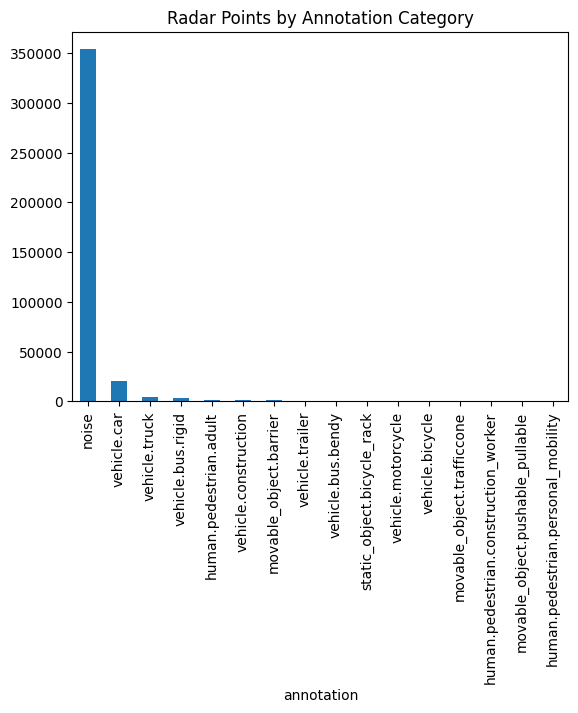

In [80]:
df_a_n_s['annotation'].value_counts().plot(kind='bar', title='Radar Points by Annotation Category')

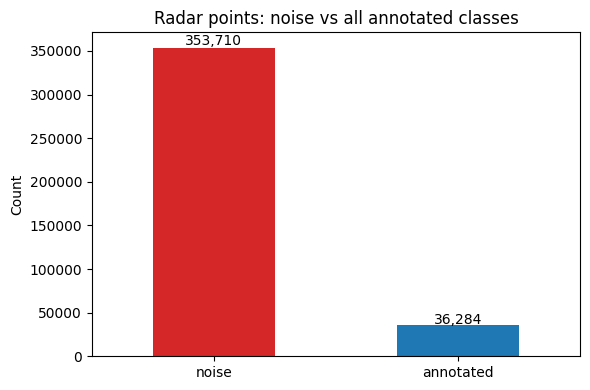

In [81]:
# Use df_a_n_s (loaded in cell 42) to plot noise vs all annotated classes
noise_count = (df_a_n_s['annotation'] == 'noise').sum()
annotated_count = len(df_a_n_s) - noise_count

counts = pd.Series({'noise': noise_count, 'annotated': annotated_count})

plt.figure(figsize=(6,4))
counts.plot(kind='bar', color=['#d62728', '#1f77b4'])
plt.title('Radar points: noise vs all annotated classes')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, v in enumerate(counts.values):
    plt.text(i, v * 1.01, f'{v:,}', ha='center')
plt.tight_layout()
plt.show()

---

In [82]:
df_a_n_s.columns

Index(['sample_token', 'radar_channel', 'annotation', 'annotation_token',
       'instance_token', 'num_sample', 'timestamp', 'point_time_offset',
       'is_sample', 'utc_timestamp', 'scene_name', 'file_name', 'x_radar',
       'y_radar', 'z_radar', 'dyn_prop', 'id', 'rcs', 'vx', 'vy', 'vx_comp',
       'vy_comp', 'is_quality_valid', 'ambig_state', 'x_rms', 'y_rms',
       'invalid_state', 'pdh0', 'vx_rms', 'vy_rms'],
      dtype='object')

In [83]:
df_a_n_s.head(100)

,sample_token,radar_channel,annotation,annotation_token,instance_token,num_sample,timestamp,point_time_offset,is_sample,utc_timestamp,...,vx_comp,vy_comp,is_quality_valid,ambig_state,x_rms,y_rms,invalid_state,pdh0,vx_rms,vy_rms
0,ca9a282c9e77460f8360f564131a8af5,RADAR_FRONT,vehicle.truck,NaN,83d881a6b3d94ef3a3bc3b585cc514f8,0,1532402927664178,-0.016227,False,2018-07-24 03:28:47,...,-0.366139,-0.236651,1.0,3.0,19.0,19.0,0.0,1.0,17.0,3.0
1,ca9a282c9e77460f8360f564131a8af5,RADAR_FRONT,vehicle.truck,NaN,83d881a6b3d94ef3a3bc3b585cc514f8,0,1532402927664178,-0.016227,False,2018-07-24 03:28:47,...,-0.181025,-0.081084,1.0,3.0,19.0,19.0,0.0,1.0,16.0,3.0
2,ca9a282c9e77460f8360f564131a8af5,RADAR_FRONT,vehicle.truck,NaN,83d881a6b3d94ef3a3bc3b585cc514f8,0,1532402927664178,-0.016227,False,2018-07-24 03:28:47,...,-0.178248,-0.074270,1.0,3.0,19.0,19.0,0.0,1.0,16.0,3.0
3,ca9a282c9e77460f8360f564131a8af5,RADAR_FRONT,movable_object.barrier,NaN,2bfcc693ae9946daba1d9f2724478fd4,0,1532402927664178,-0.016227,False,2018-07-24 03:28:47,...,-0.115546,0.079727,1.0,3.0,19.0,19.0,0.0,1.0,17.0,3.0
4,ca9a282c9e77460f8360f564131a8af5,RADAR_FRONT,noise,NaN,NaN,0,1532402927664178,-0.016227,False,2018-07-24 03:28:47,...,-0.083199,0.067701,1.0,3.0,19.0,19.0,0.0,1.0,17.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ca9a282c9e77460f8360f564131a8af5,RADAR_FRONT_LEFT,noise,NaN,NaN,0,1532402927652686,-0.004735,False,2018-07-24 03:28:47,...,0.218965,0.017678,1.0,3.0,21.0,21.0,0.0,1.0,16.0,3.0
96,ca9a282c9e77460f8360f564131a8af5,RADAR_FRONT_RIGHT,noise,NaN,NaN,0,1532402927639817,0.008134,False,2018-07-24 03:28:47,...,-0.119503,0.006151,1.0,3.0,19.0,19.0,0.0,1.0,16.0,3.0
97,ca9a282c9e77460f8360f564131a8af5,RADAR_FRONT_RIGHT,noise,NaN,NaN,0,1532402927639817,0.008134,False,2018-07-24 03:28:47,...,-0.270371,-0.049890,1.0,3.0,19.0,20.0,0.0,1.0,16.0,3.0
98,ca9a282c9e77460f8360f564131a8af5,RADAR_FRONT_RIGHT,noise,NaN,NaN,0,1532402927639817,0.008134,False,2018-07-24 03:28:47,...,-0.350742,-0.353020,1.0,3.0,19.0,19.0,0.0,1.0,17.0,3.0


Total points: 389,994
Noise points: 353,710 (90.7%)
Number of samples: 404
Average points per sample: 965.33 (std: 230.01)
Average noise points per sample: 875.52 (std: 226.42)

Per-class instance summary (including noise):
                                      num_instances  total_points  avg_pts_per_instance  std_pts_per_instance  median_pts_per_instance  min_pts_per_instance  max_pts_per_instance  avg_rcs_per_instance  std_rcs_per_instance
annotation                                                                                                                                                                                                                    
vehicle.bus.rigid                               188          3268                 17.38                 21.31                     9.00                     1                    99                  7.36                  4.54
vehicle.trailer                                  54           887                 16.43                  6.

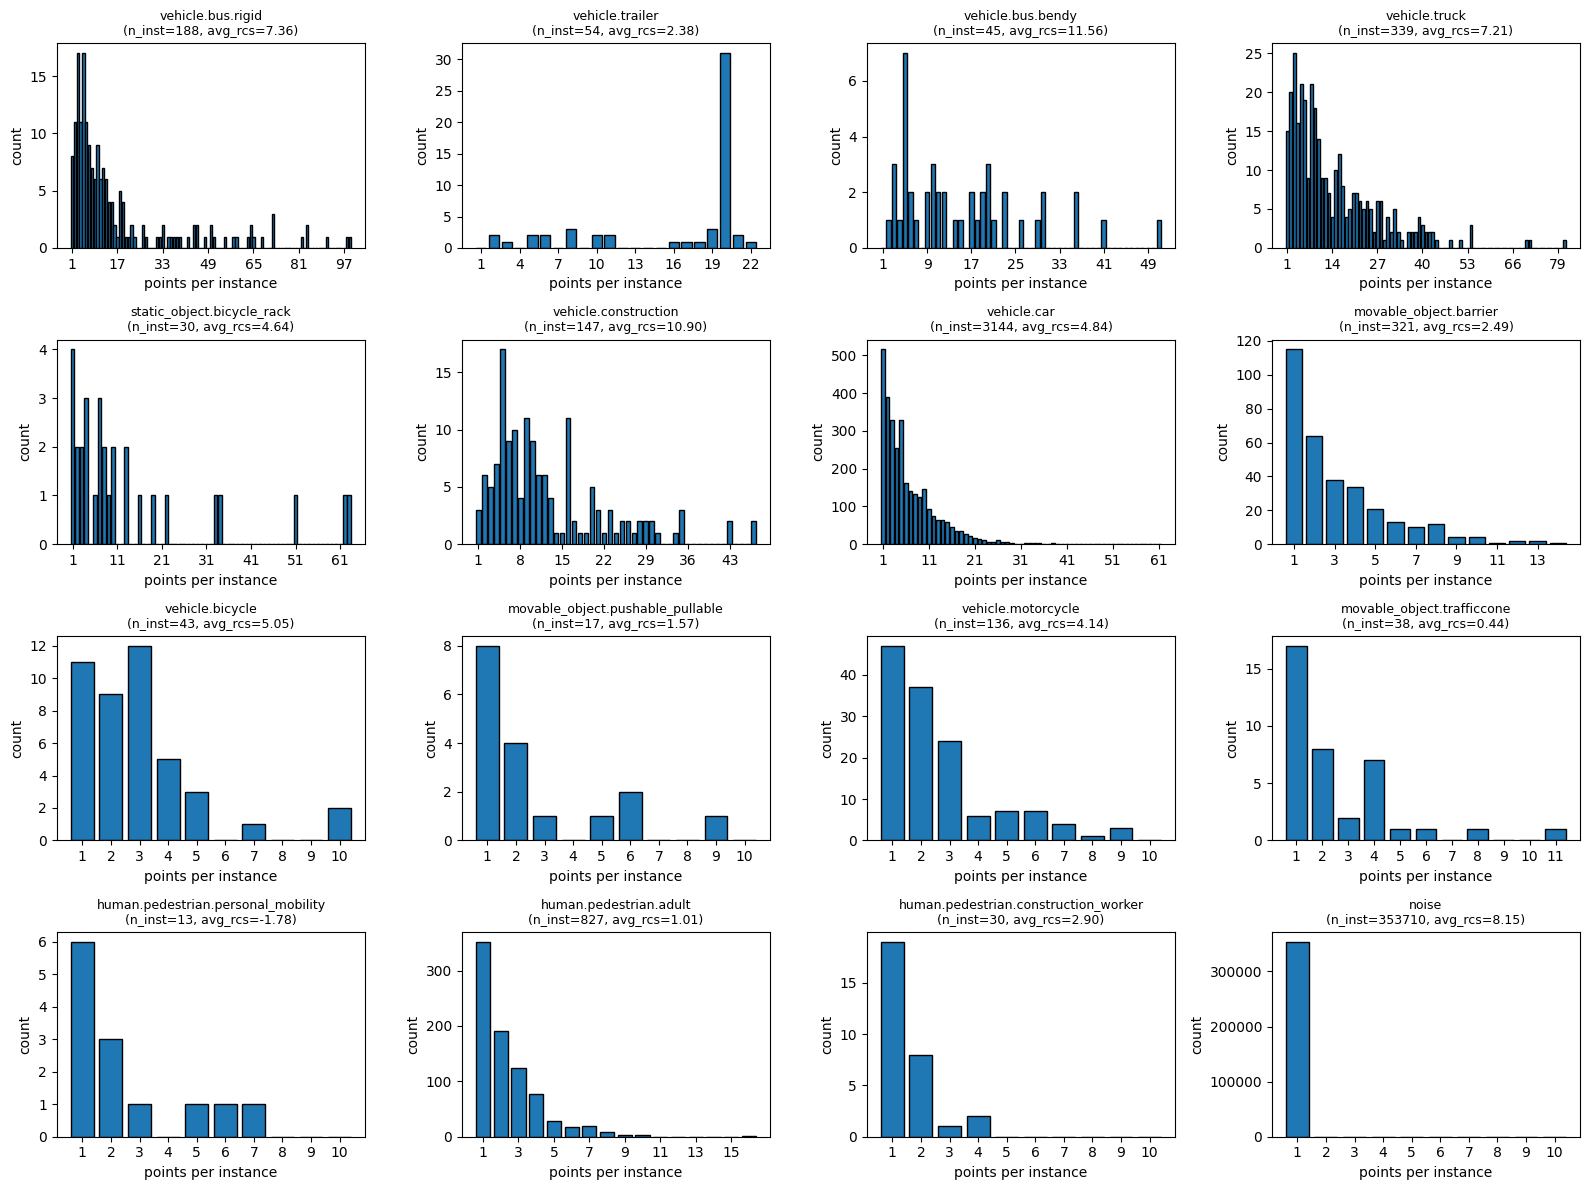

In [132]:
# Treat noise as an ordinary class: give rows without an instance_token a unique token
df = df_a_n_s.copy()
df['instance_token'] = df['instance_token'].fillna('').astype(str)

# For grouping, use real instance_token when present, otherwise use a unique per-row token
df['group_instance_token'] = df['instance_token'].where(df['instance_token'] != '', df.index.astype(str))

# Counts per instance (points) — include noise now as a regular class
inst_counts = (
    df
    .groupby(['annotation', 'group_instance_token'])
    .size()
    .reset_index(name='pts_per_instance')
)

# Average RCS (and its std) per instance
inst_rcs = (
    df
    .groupby(['annotation', 'group_instance_token'])['rcs']
    .agg(avg_rcs_per_instance='mean', std_rcs_per_instance='std')
    .reset_index()
)

# Merge counts and rcs per-instance
inst_stats = inst_counts.merge(inst_rcs, on=['annotation', 'group_instance_token'])

# Summary per annotation class (include std and RCS info)
summary = (
    inst_stats
    .groupby('annotation')
    .agg(
        num_instances=('group_instance_token', 'count'),
        total_points=('pts_per_instance', 'sum'),
        avg_pts_per_instance=('pts_per_instance', 'mean'),
        std_pts_per_instance=('pts_per_instance', 'std'),
        median_pts_per_instance=('pts_per_instance', 'median'),
        min_pts_per_instance=('pts_per_instance', 'min'),
        max_pts_per_instance=('pts_per_instance', 'max'),
        avg_rcs_per_instance=('avg_rcs_per_instance', 'mean'),
        std_rcs_per_instance=('avg_rcs_per_instance', 'std')
    )
    .fillna({'std_pts_per_instance': 0, 'std_rcs_per_instance': 0})
    .sort_values('avg_pts_per_instance', ascending=False)
)

# Noise stats (kept as ordinary class but still report noise point count)
noise_count = (df['annotation'] == 'noise').sum()
total_points = len(df)

# --- New: per-sample stats: average points per sample and average noise per sample ---
n_samples = int(df['sample_token'].nunique())
pts_per_sample = df.groupby('sample_token').size()                     # number of points in each sample
noise_per_sample = df.assign(is_noise=(df['annotation'] == 'noise')).groupby('sample_token')['is_noise'].sum()

avg_pts_per_sample = pts_per_sample.mean() if n_samples > 0 else 0.0
std_pts_per_sample = pts_per_sample.std(ddof=0) if n_samples > 0 else 0.0
avg_noise_per_sample = noise_per_sample.mean() if n_samples > 0 else 0.0
std_noise_per_sample = noise_per_sample.std(ddof=0) if n_samples > 0 else 0.0
# ------------------------------------------------------------------------------

print(f"Total points: {total_points:,}")
print(f"Noise points: {noise_count:,} ({noise_count/total_points:.1%})")
print(f"Number of samples: {n_samples:,}")
print(f"Average points per sample: {avg_pts_per_sample:.2f} (std: {std_pts_per_sample:.2f})")
print(f"Average noise points per sample: {avg_noise_per_sample:.2f} (std: {std_noise_per_sample:.2f})")
print()
print("Per-class instance summary (including noise):")
print(summary.to_string(float_format="%.2f"))

# Optional: overall average and std across all instances (points)
if not inst_stats.empty:
    overall_avg = inst_stats['pts_per_instance'].mean()
    overall_std = inst_stats['pts_per_instance'].std(ddof=0)  # population std; use ddof=1 for sample std
    overall_avg_rcs = inst_stats['avg_rcs_per_instance'].mean()
    overall_std_rcs = inst_stats['avg_rcs_per_instance'].std(ddof=0)
else:
    overall_avg = overall_std = overall_avg_rcs = overall_std_rcs = 0.0

print()
print(f"Overall average points per instance: {overall_avg:.2f}")
print(f"Overall std dev of points per instance: {overall_std:.2f}")
print(f"Overall average RCS per instance: {overall_avg_rcs:.3f}")
print(f"Overall std dev of RCS across instances: {overall_std_rcs:.3f}")

# ---------------------------
# Histogram: points-per-instance for each class
# ---------------------------
classes = summary.index.tolist()
n_classes = len(classes)
if n_classes == 0:
    print("No classes to plot.")
else:
    cols = min(4, n_classes)
    rows = int(np.ceil(n_classes / cols))
    plt.figure(figsize=(cols * 4, rows * 3))
    for i, cls in enumerate(classes):
        ax = plt.subplot(rows, cols, i + 1)
        data = inst_stats.loc[inst_stats['annotation'] == cls, 'pts_per_instance']
        if data.empty:
            ax.text(0.5, 0.5, 'no data', ha='center', va='center')
            ax.set_title(cls)
            ax.set_xticks([])
            continue
        # integer bins from 1..max
        maxval = int(max(data.max(), 10))
        bins = np.arange(1, maxval + 2) - 0.5  # center integer bins
        ax.hist(data, bins=bins, color='C0', edgecolor='k', rwidth=0.8)
        ax.set_title(f"{cls}\n(n_inst={int(summary.loc[cls,'num_instances'])}, avg_rcs={summary.loc[cls,'avg_rcs_per_instance']:.2f})", fontsize=9)
        ax.set_xlabel('points per instance')
        ax.set_ylabel('count')
        ax.set_xticks(range(1, maxval + 1, max(1, maxval // 6)))
    plt.tight_layout()
    plt.show()


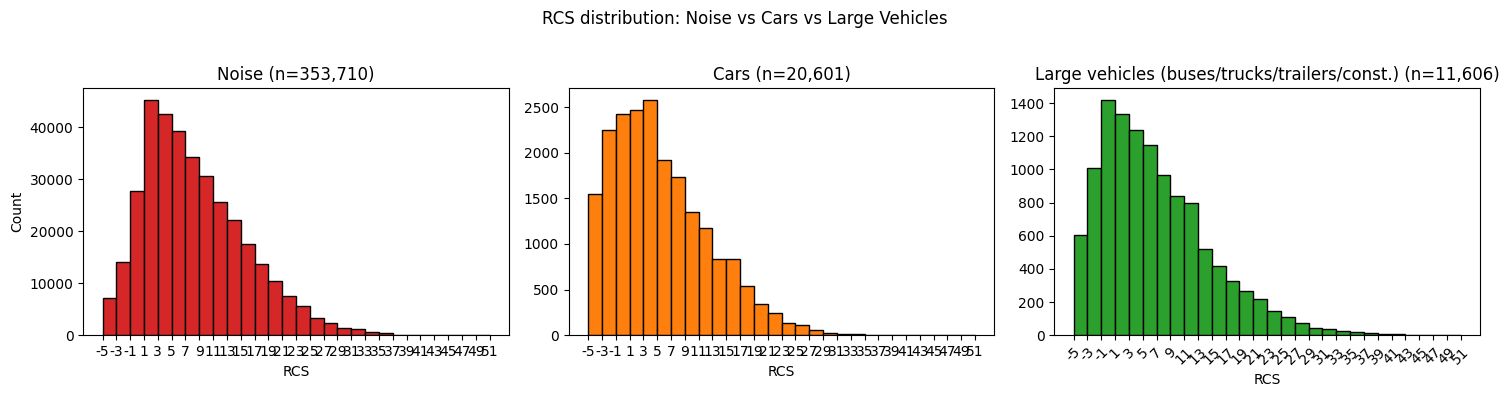

In [131]:
# Histogram of RCS for noise points plus cars and large vehicles (same x-axis, multiple plots)

# prefer existing `df` if defined by downstream cells; fallback to df_a_n_s
try:
    _df = df
except NameError:
    _df = df_a_n_s.copy()

noise_rcs = _df.loc[_df['annotation'] == 'noise', 'rcs'].dropna()

# cars
car_mask = _df['annotation'].str.startswith('vehicle.car', na=False)
car_rcs = _df.loc[car_mask, 'rcs'].dropna()

# large vehicles: buses, trucks, trailers, construction vehicles
large_mask = (
    _df['annotation'].str.startswith('vehicle.bus', na=False) |
    _df['annotation'].str.startswith('vehicle.truck', na=False) |
    _df['annotation'].str.startswith('vehicle.trailer', na=False) |
    _df['annotation'].str.startswith('vehicle.construction', na=False)
)
large_rcs = _df.loc[large_mask, 'rcs'].dropna()

if noise_rcs.empty and car_rcs.empty and large_rcs.empty:
    print("No RCS values found for noise, cars or large vehicles.")
else:
    # determine common x-axis range across available series
    series_list = [s for s in (noise_rcs, car_rcs, large_rcs) if not s.empty]
    global_min = min(s.min() for s in series_list)
    global_max = max(s.max() for s in series_list)

    xmin = np.floor(global_min)
    xmax = np.ceil(global_max)

    if xmax - xmin < 2:
        bins = np.linspace(global_min, global_max, 20)
    else:
        bins = np.arange(xmin, xmax + 2, 2)

    # Do not share y-axis so each subplot auto-scales its Y to the data
    fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=False)

    axs[0].hist(noise_rcs, bins=bins, color='C3', edgecolor='k')
    axs[0].set_title(f"Noise (n={len(noise_rcs):,})")
    axs[0].set_xlabel('RCS')
    axs[0].set_ylabel('Count')

    axs[1].hist(car_rcs, bins=bins, color='C1', edgecolor='k')
    axs[1].set_title(f"Cars (n={len(car_rcs):,})")
    axs[1].set_xlabel('RCS')

    axs[2].hist(large_rcs, bins=bins, color='C2', edgecolor='k')
    axs[2].set_title(f"Large vehicles (buses/trucks/trailers/const.) (n={len(large_rcs):,})")
    axs[2].set_xlabel('RCS')

    # show common bin edges on x-axis for readability
    xticks = bins
    axs[-1].set_xticks(xticks)
    axs[-1].set_xticklabels([f"{e:.0f}" for e in xticks], rotation=45)

    plt.suptitle('RCS distribution: Noise vs Cars vs Large Vehicles')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [89]:
df_a_n_s['x_radar'].max(), df_a_n_s['y_radar'].max()

(252.19666552782127, 256.1861428198177)

Filtered points (<=50m): 216,883 / 389,994
Total points (<=50m): 216,883
Noise points (<=50m): 183,031 (84.4%)

Per-class instance summary (annotated objects only, <=50m):
                                      num_instances  total_points  avg_pts_per_instance  std_pts_per_instance  median_pts_per_instance  min_pts_per_instance  max_pts_per_instance
annotation                                                                                                                                                                        
vehicle.bus.rigid                               152          2964             19.500000             23.102421                      9.0                     1                    99
vehicle.bus.bendy                                36           629             17.472222             11.755816                     17.0                     2                    51
vehicle.trailer                                  51           880             17.254902              5.078752   

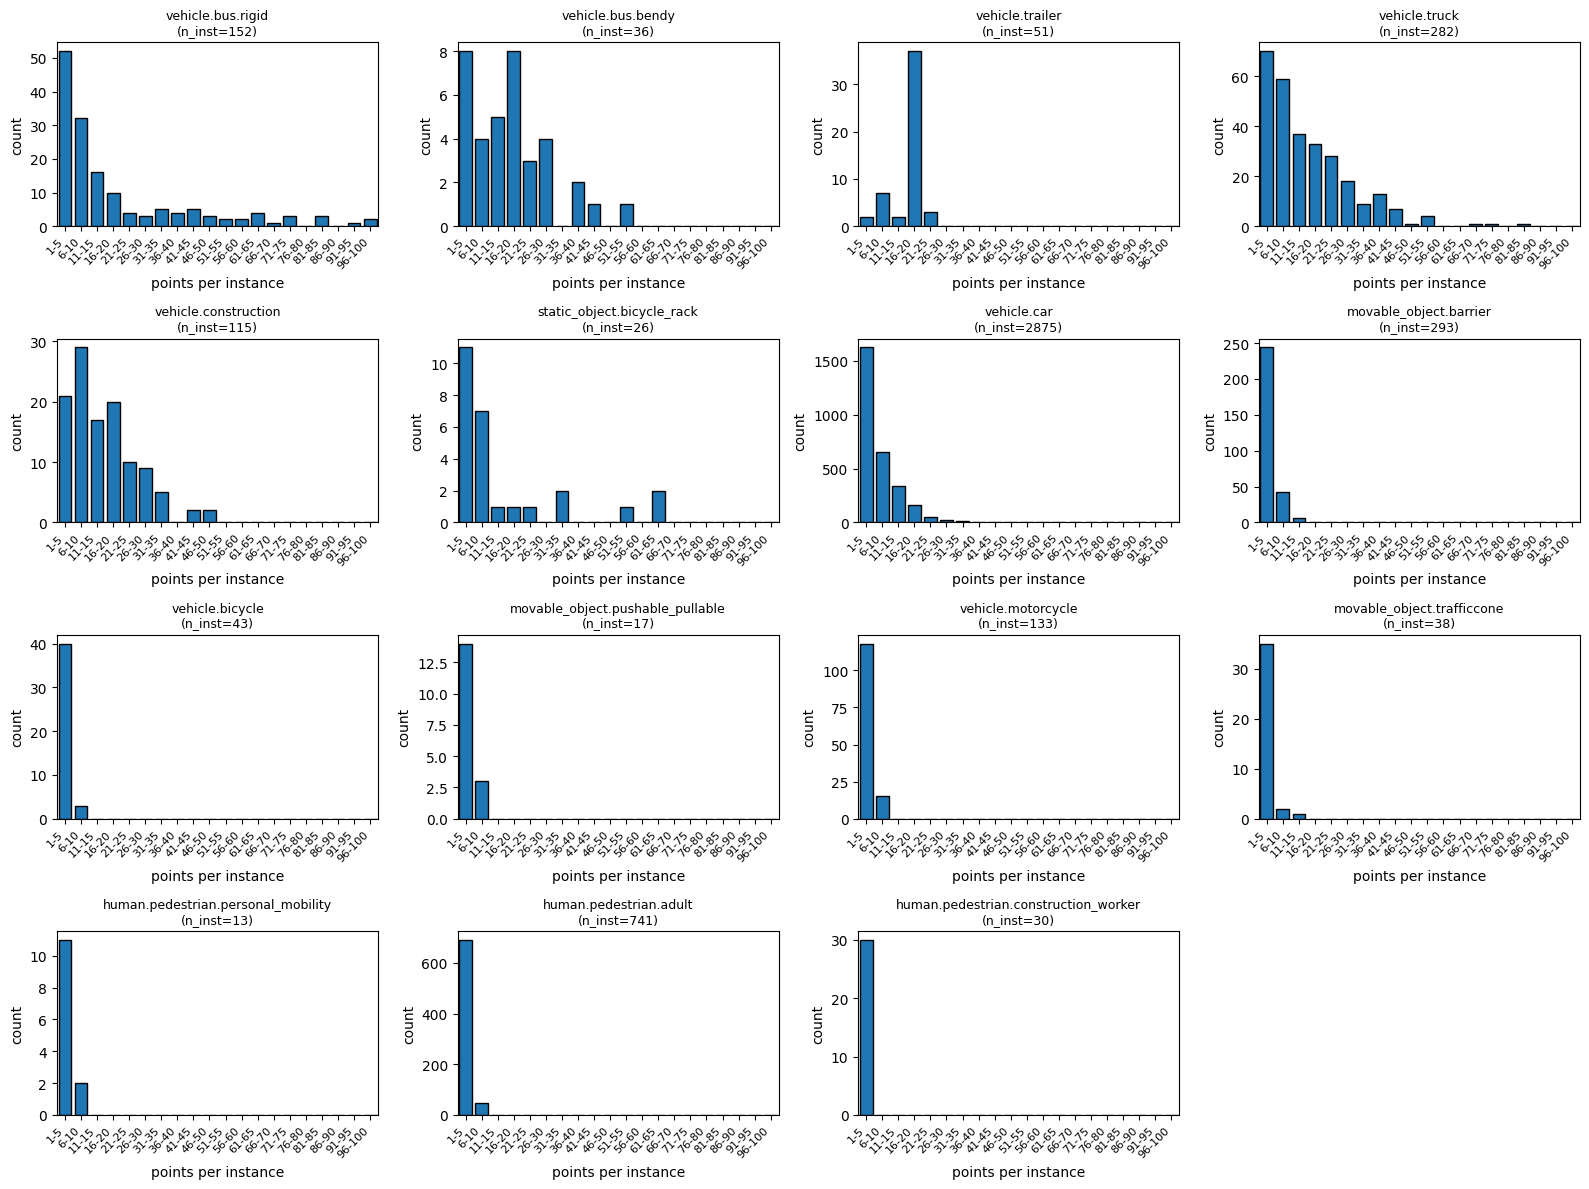

In [104]:
# Remake analysis for points up to 50 m from origin (XY plane)

# Copy loaded dataframe
df = df_a_n_s.copy()

# Compute distance from origin in XY plane and filter
df["dist"] = np.hypot(df['x_radar'].to_numpy(), df['y_radar'].to_numpy())
df = df[df["dist"] <= 50.0].reset_index(drop=True)

print(f"Filtered points (<=50m): {len(df):,} / {len(df_a_n_s):,}")

# Ensure instance_token is string and mark empty/missing
df['instance_token'] = df['instance_token'].fillna('').astype(str)

# Separate annotated objects (have instance_token) from noise
annotated_mask = (df['annotation'] != 'noise') & (df['instance_token'] != '')

# Counts per instance
inst_counts = (
    df[annotated_mask]
    .groupby(['annotation', 'instance_token'])
    .size()
    .reset_index(name='pts_per_instance')
)

# Summary per annotation class (include std)
summary = (
    inst_counts
    .groupby('annotation')['pts_per_instance']
    .agg(
        num_instances='count',
        total_points='sum',
        avg_pts_per_instance='mean',
        std_pts_per_instance='std',
        median_pts_per_instance='median',
        min_pts_per_instance='min',
        max_pts_per_instance='max'
    )
    .fillna({'std_pts_per_instance': 0})
    .sort_values('avg_pts_per_instance', ascending=False)
)

# Noise stats
noise_count = (df['annotation'] == 'noise').sum()
total_points = len(df)

print(f"Total points (<=50m): {total_points:,}")
print(f"Noise points (<=50m): {noise_count:,} ({noise_count/total_points:.1%})\n")

print("Per-class instance summary (annotated objects only, <=50m):")
print(summary.to_string())

# Overall stats across annotated instances
if not inst_counts.empty:
    overall_avg = inst_counts['pts_per_instance'].mean()
    overall_std = inst_counts['pts_per_instance'].std(ddof=0)
else:
    overall_avg = 0.0
    overall_std = 0.0

print(f"\nOverall average points per annotated instance (<=50m): {overall_avg:.2f}")
print(f"Overall std dev of points per annotated instance (<=50m): {overall_std:.2f}")

# Fixed-width (5) bins across all classes: 1-5, 6-10, 11-15, ...
classes = summary.index.tolist()
n_classes = len(classes)
if n_classes == 0:
    print("No annotated classes to plot.")
else:
    # determine global max to create consistent bins
    if not inst_counts.empty:
        global_max = int(inst_counts['pts_per_instance'].max())
    else:
        global_max = 10
    # round up to next multiple of 5
    max_edge = ((global_max - 1) // 5 + 1) * 5
    edges = np.arange(1, max_edge + 5, 5)  # edges like [1,6,11,..., max_edge+1]
    labels = [f"{edges[i]}-{edges[i+1]-1}" for i in range(len(edges)-1)]

    cols = min(4, n_classes)
    rows = int(np.ceil(n_classes / cols))
    plt.figure(figsize=(cols * 4, rows * 3))
    for i, cls in enumerate(classes):
        ax = plt.subplot(rows, cols, i + 1)
        data = inst_counts.loc[inst_counts['annotation'] == cls, 'pts_per_instance']
        if data.empty:
            ax.text(0.5, 0.5, 'no data', ha='center', va='center')
            ax.set_title(cls)
            ax.set_xticks([])
            continue

        counts, _ = np.histogram(data, bins=edges)
        x = np.arange(len(counts))
        ax.bar(x, counts, color='C0', edgecolor='k', width=0.8)
        ax.set_title(f"{cls}\n(n_inst={int(summary.loc[cls,'num_instances'])})", fontsize=9)
        ax.set_xlabel('points per instance')
        ax.set_ylabel('count')
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
        ax.set_xlim(-0.5, len(counts)-0.5)
    plt.tight_layout()
    plt.show()

In [97]:
# Remake analysis for points up to 50 m from origin (XY plane)

# Copy loaded dataframe
df = df_a_n_s.copy()

# Compute distance from origin in XY plane and filter
df["dist"] = np.hypot(df['x_radar'].to_numpy(), df['y_radar'].to_numpy())
df = df[df["dist"] <= 100.0].reset_index(drop=True)

print(f"Filtered points (<=100m): {len(df):,} / {len(df_a_n_s):,}")

# Ensure instance_token is string and mark empty/missing
df['instance_token'] = df['instance_token'].fillna('').astype(str)

# Separate annotated objects (have instance_token) from noise
annotated_mask = (df['annotation'] != 'noise') & (df['instance_token'] != '')

# Counts per instance
inst_counts = (
    df[annotated_mask]
    .groupby(['annotation', 'instance_token'])
    .size()
    .reset_index(name='pts_per_instance')
)

# Summary per annotation class (include std)
summary = (
    inst_counts
    .groupby('annotation')['pts_per_instance']
    .agg(
        num_instances='count',
        total_points='sum',
        avg_pts_per_instance='mean',
        std_pts_per_instance='std',
        median_pts_per_instance='median',
        min_pts_per_instance='min',
        max_pts_per_instance='max'
    )
    .fillna({'std_pts_per_instance': 0})
    .sort_values('avg_pts_per_instance', ascending=False)
)

# Noise stats
noise_count = (df['annotation'] == 'noise').sum()
total_points = len(df)

print(f"Total points (<=100m): {total_points:,}")
print(f"Noise points (<=100m): {noise_count:,} ({noise_count/total_points:.1%})\n")

print("Per-class instance summary (annotated objects only, <=100m):")
print(summary.to_string())

# Overall stats across annotated instances
if not inst_counts.empty:
    overall_avg = inst_counts['pts_per_instance'].mean()
    overall_std = inst_counts['pts_per_instance'].std(ddof=0)
else:
    overall_avg = 0.0
    overall_std = 0.0

print(f"\nOverall average points per annotated instance (<=100m): {overall_avg:.2f}")
print(f"Overall std dev of points per annotated instance (<=100m): {overall_std:.2f}")

Filtered points (<=100m): 362,711 / 389,994
Total points (<=100m): 362,711
Noise points (<=100m): 326,436 (90.0%)

Per-class instance summary (annotated objects only, <=100m):
                                      num_instances  total_points  avg_pts_per_instance  std_pts_per_instance  median_pts_per_instance  min_pts_per_instance  max_pts_per_instance
annotation                                                                                                                                                                        
vehicle.bus.rigid                               187          3263             17.449198             21.352176                      9.0                     1                    99
vehicle.trailer                                  54           887             16.425926              6.020725                     20.0                     2                    22
vehicle.bus.bendy                                45           688             15.288889             11.43285

---

In [45]:
from sklearn.cluster import DBSCAN

# DBSCAN on the current sample and evaluate how many annotated 'noise' points are
# also labeled as noise by DBSCAN.

eps = 0.2
min_samples = 5

sample_token = sample['token']

if df_a_n_s.empty:
    print(f"No rows in df_a_n_s for sample {sample_token}")
else:
    coords = df_a_n_s[['x_radar', 'y_radar']].values

    db = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
    labels = db.fit_predict(coords)   # -1 means noise

    df_a_n_s['dbscan_label'] = labels
    predicted_noise = labels == -1
    annotated_noise = df_a_n_s['annotation'] == 'noise'

    TP = int(np.sum(predicted_noise & annotated_noise))   # correctly identified noise
    FP = int(np.sum(predicted_noise & ~annotated_noise))  # DBSCAN marked as noise but annotation != 'noise'
    FN = int(np.sum(~predicted_noise & annotated_noise))  # annotated noise but DBSCAN put in cluster
    TN = int(np.sum(~predicted_noise & ~annotated_noise))

    total_annotated_noise = int(annotated_noise.sum())
    total_predicted_noise = int(predicted_noise.sum())
    total_points = len(df_a_n_s)

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0

    print(f"Sample: {sample_token}  (n_points={total_points})")
    print(f"DBSCAN params: eps={eps}, min_samples={min_samples}")
    print(f"Annotated 'noise' points: {total_annotated_noise}")
    print(f"DBSCAN predicted noise points: {total_predicted_noise}")
    print(f"True Positives (correctly classified as noise): {TP}")
    print(f"False Positives (DBSCAN noise but annotated non-noise): {FP}")
    print(f"False Negatives (annotated noise but DBSCAN clustered): {FN}")
    print(f"True Negatives: {TN}")
    print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}")

    # Optionally display some mismatched examples
    mismatched_fp = df_a_n_s[predicted_noise & ~annotated_noise]
    mismatched_fn = df_a_n_s[~predicted_noise & annotated_noise]

    if not mismatched_fp.empty:
        print(f"\nExample DBSCAN-noise but annotated != 'noise' (show up to 5):")
        display_cols = ['radar_channel', 'annotation', 'x_radar', 'y_radar', 'file_name']
        print(mismatched_fp[display_cols].head(5).to_string(index=False))

    if not mismatched_fn.empty:
        print(f"\nExample annotated 'noise' but DBSCAN clustered (show up to 5):")
        print(mismatched_fn[display_cols].head(5).to_string(index=False))

Sample: abf3d91d3c28407e80e3334fe89c03cb  (n_points=389994)
DBSCAN params: eps=0.2, min_samples=5
Annotated 'noise' points: 353710
DBSCAN predicted noise points: 119367
True Positives (correctly classified as noise): 115300
False Positives (DBSCAN noise but annotated non-noise): 4067
False Negatives (annotated noise but DBSCAN clustered): 238410
True Negatives: 32217
Precision: 0.966, Recall: 0.326, F1: 0.487

Example DBSCAN-noise but annotated != 'noise' (show up to 5):
radar_channel             annotation   x_radar   y_radar                                                                            file_name
  RADAR_FRONT            vehicle.car -1.942568 36.036287 samples/RADAR_FRONT/n015-2018-07-24-11-22-45+0800__RADAR_FRONT__1532402927664178.pcd
  RADAR_FRONT            vehicle.car -9.612757 78.412729 samples/RADAR_FRONT/n015-2018-07-24-11-22-45+0800__RADAR_FRONT__1532402927664178.pcd
  RADAR_FRONT            vehicle.car  2.873044 39.797943 samples/RADAR_FRONT/n015-2018-07-24-11-22